# Одномерный МКЭ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def solution(x):
    return np.sqrt(30) / (2 * np.cos(np.sqrt(30))) * np.sin(np.sqrt(30) * x)

In [3]:
def phi_i(x, x1, i, h):
    if i == 1:
        return (x1[1] - x) / h if x1[0] <= x <= x1[1] else 0
    elif i == len(x1):
        return (x - x1[-2]) / h if x1[-2] <= x <= x1[-1] else 0
    else:
        if x1[i-2] <= x <= x1[i-1]:
            return (x - x1[i-2]) / h
        elif x1[i-1] <= x <= x1[i]:
            return (x1[i] - x) / h
        else:
            return 0

In [4]:
def dphi_i(x, x1, i, h):
    if i == 1:
        return -1 / h if x1[0] <= x <= x1[1] else 0
    elif i == len(x1):
        return 1 / h if x1[-2] <= x <= x1[-1] else 0
    else:
        if x1[i-2] <= x <= x1[i-1]:
            return 1 / h
        elif x1[i-1] <= x <= x1[i]:
            return -1 / h
        else:
            return 0

In [5]:
def solve(N=40):
    b1, b2 = 0, 1
    h = (b2 - b1) / (N - 1)
    x1 = np.linspace(b1, b2, N)
    
    A = np.zeros((N, N))
    F = np.zeros(N)

    A[0, 0] = 1
    F[0] = 0

    for i in range(1, N):
        F[i] = 0  
        for n in range(1, N):
            integrand = lambda x: -dphi_i(x, x1, i, h) * dphi_i(x, x1, n, h) + phi_i(x, x1, i, h) * phi_i(x, x1, n, h)
            A[i, n], _ = quad(integrand, x1[i-1], x1[i])

    A[2, 1] = 0
    F[-1] = -15

    C = np.linalg.solve(A, F)

    N_half = N // 2
    h1 = (b2 - b1) / (N_half - 1)
    x2 = np.linspace(b1, b2, N_half)

    uN = np.zeros_like(x2)
    for i in range(N):
        uN += C[i] * np.array([phi_i(x, x1, i, h) for x in x2])

    plt.plot(x2, uN, '.', markersize=6, label='Численное решение')
    plt.plot(x1, solution(x1), 'r-', label='Точное решение')
    plt.legend()
    plt.show()

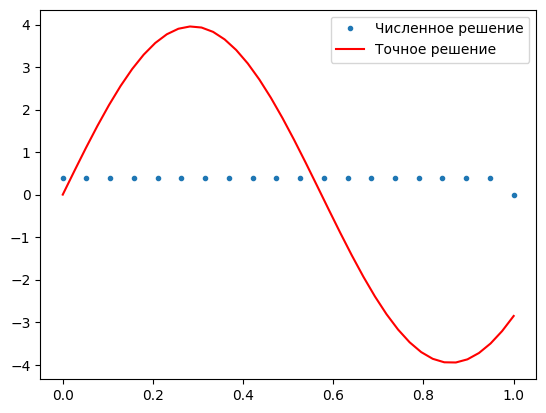

In [6]:
solve()